# NMF

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X = np.load("../Data/LPS/LPS_LT_1-1660_x.npy")
print(X.shape)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)


(1640, 92500)


In [ ]:
from sklearn.decomposition import NMF

n_components = 500  
nmf = NMF(n_components=n_components, random_state=42, max_iter=200)
W = nmf.fit_transform(X_train)  
H = nmf.components_  


reconstruction_error = nmf.reconstruction_err_

print(f"Reconstruction error train: {reconstruction_error:.8f}")

for i in range(min(3, n_components)):
    top_samples = np.argsort(W[:, i])[-5:] 
    print(f"Component {i+1} - Top sample indices: {top_samples}")
    print(f"Component {i+1} - Top weights: {W[top_samples, i]}")
    

In [ ]:
# Project test data onto learned components
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error
W_test = nmf.transform(X_test)
X_test_reconstructed = np.dot(W_test, H)

# Calculate metrics for test data
mae_test = mean_absolute_error(X_test, X_test_reconstructed)
rmse_test = root_mean_squared_error(X_test, X_test_reconstructed)
mse_test = mean_squared_error(X_test, X_test_reconstructed)

print("Test Dataset Metrics:")
print(f"MSE test: {mse_test:.8f}")
print(f"MAE test: {mae_test:.8f}")
print(f"RMSE test: {rmse_test:.8f}")


Total Dataset Metrics:
MSE: 0.00000000
MAE: 0.00000652
RMSE: 0.00002340
Overall reconstruction error: 0.81041724
NMF reconstruction error: 0.81041724
Calculated RMSE: 0.00002340
Theoretical RMSE from reconstruction error: 0.00006588
Difference: 0.0000424815


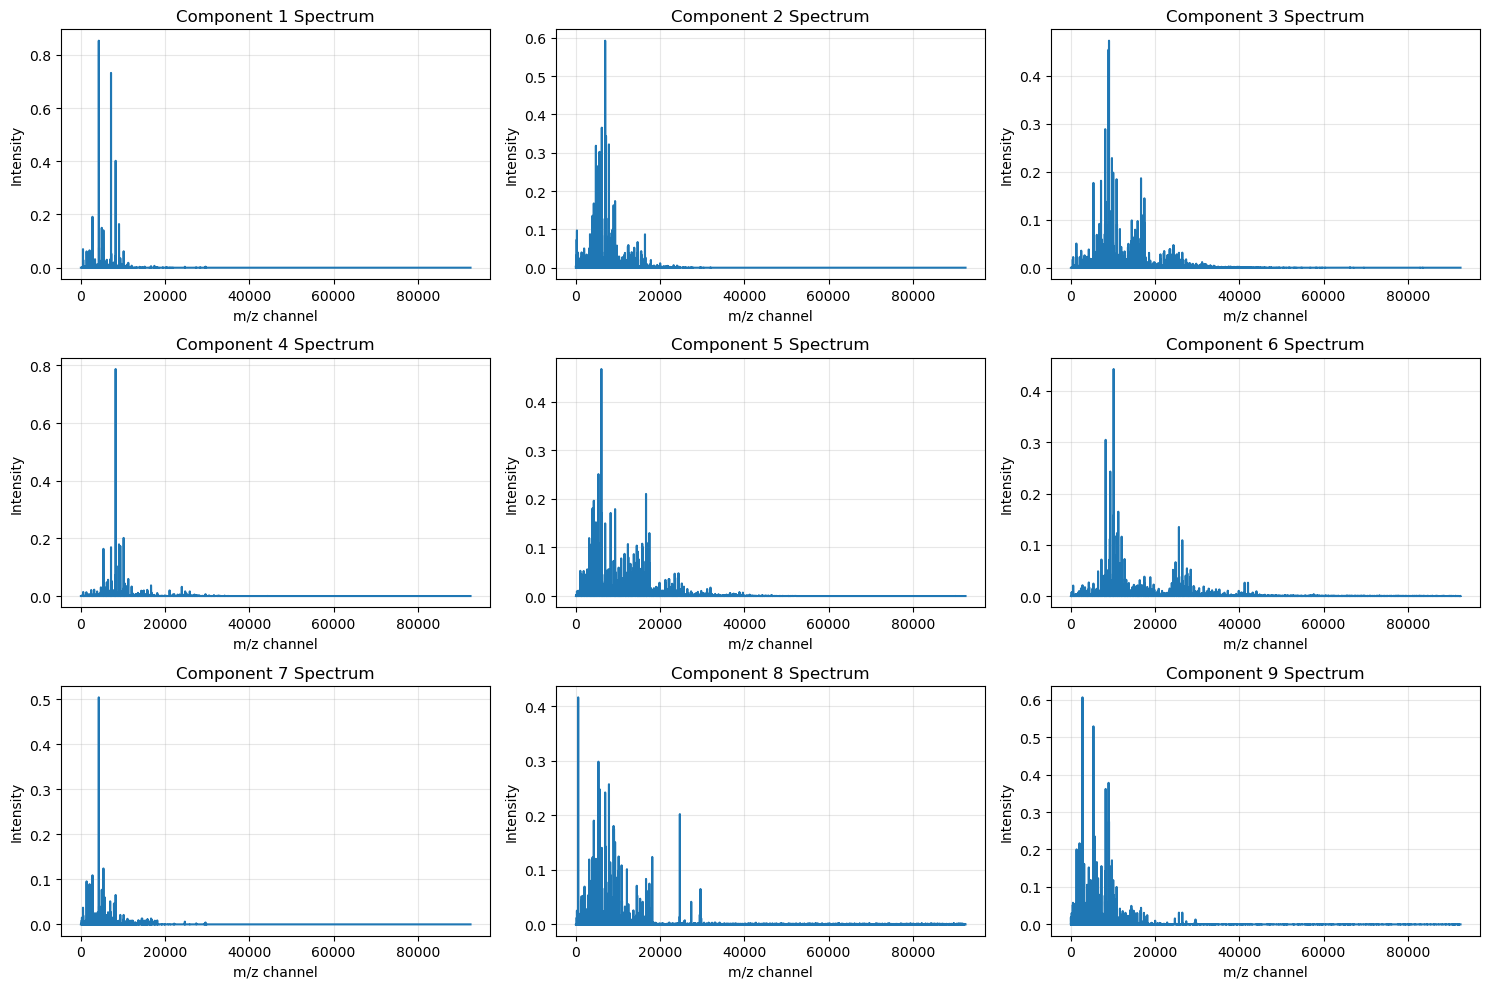

In [ ]:
plt.figure(figsize=(18, 12))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.plot(X_test[i], label='Original', alpha=0.8)
    plt.plot(X_test_reconstructed[i], label='Reconstructed', alpha=0.8, linestyle='--')
    plt.title(f'Sample {i} - Original vs Reconstructed')
    plt.xlabel('m/z channel')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

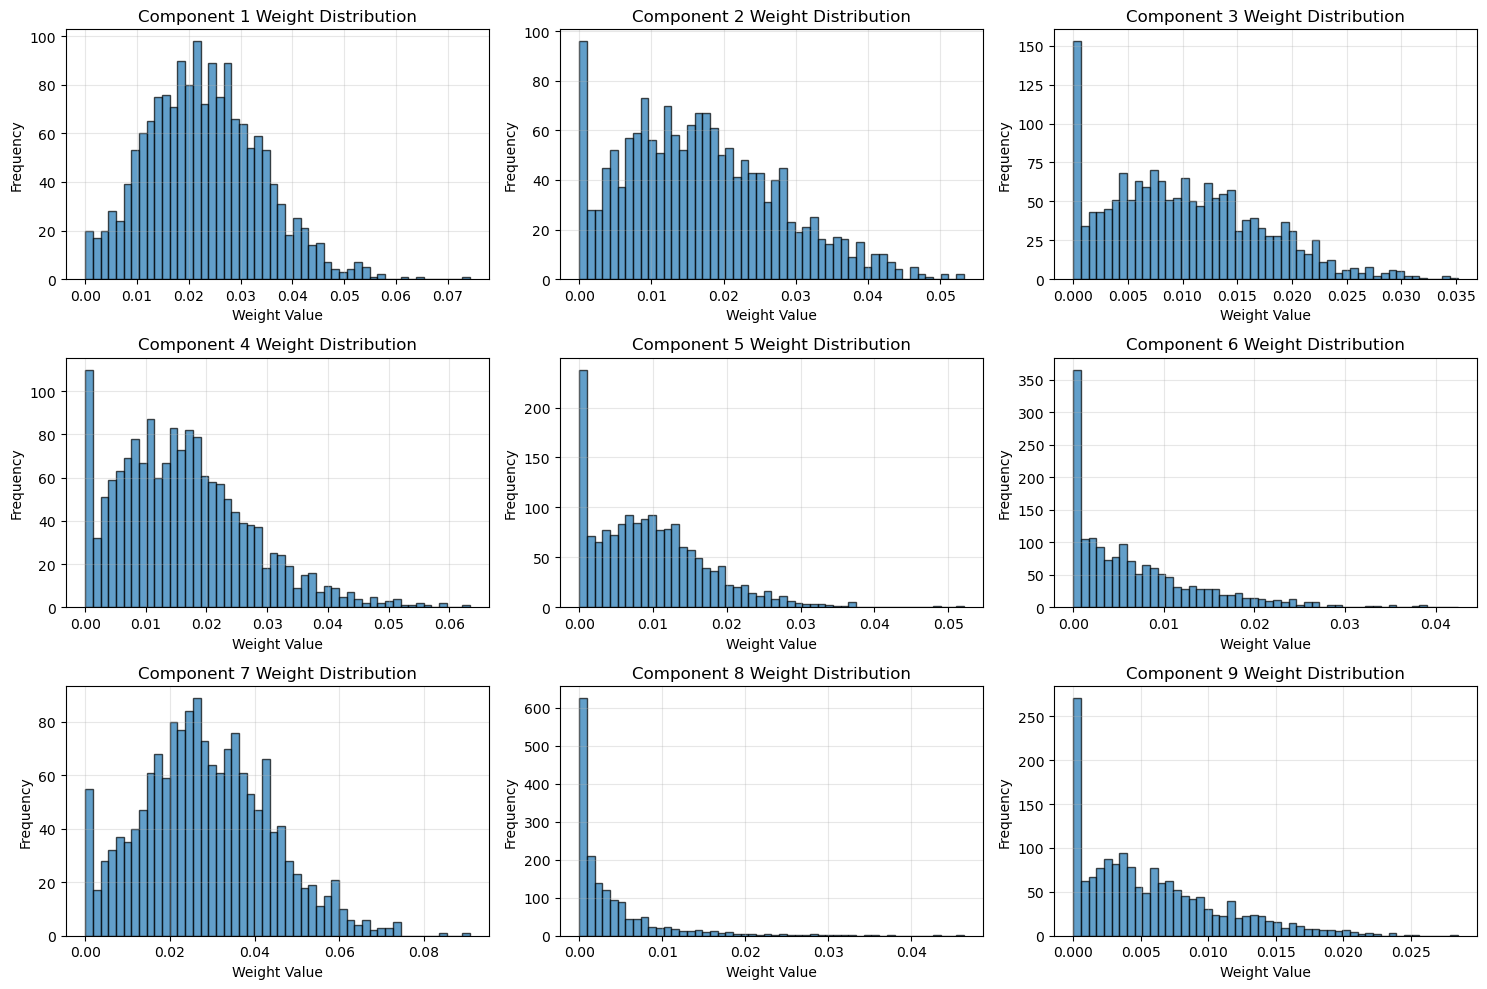

In [5]:
plt.figure(figsize=(15, 10))
for i in range(min(9, n_components)):
    plt.subplot(3, 3, i+1)
    plt.hist(W[:, i], bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'Component {i+1} Weight Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

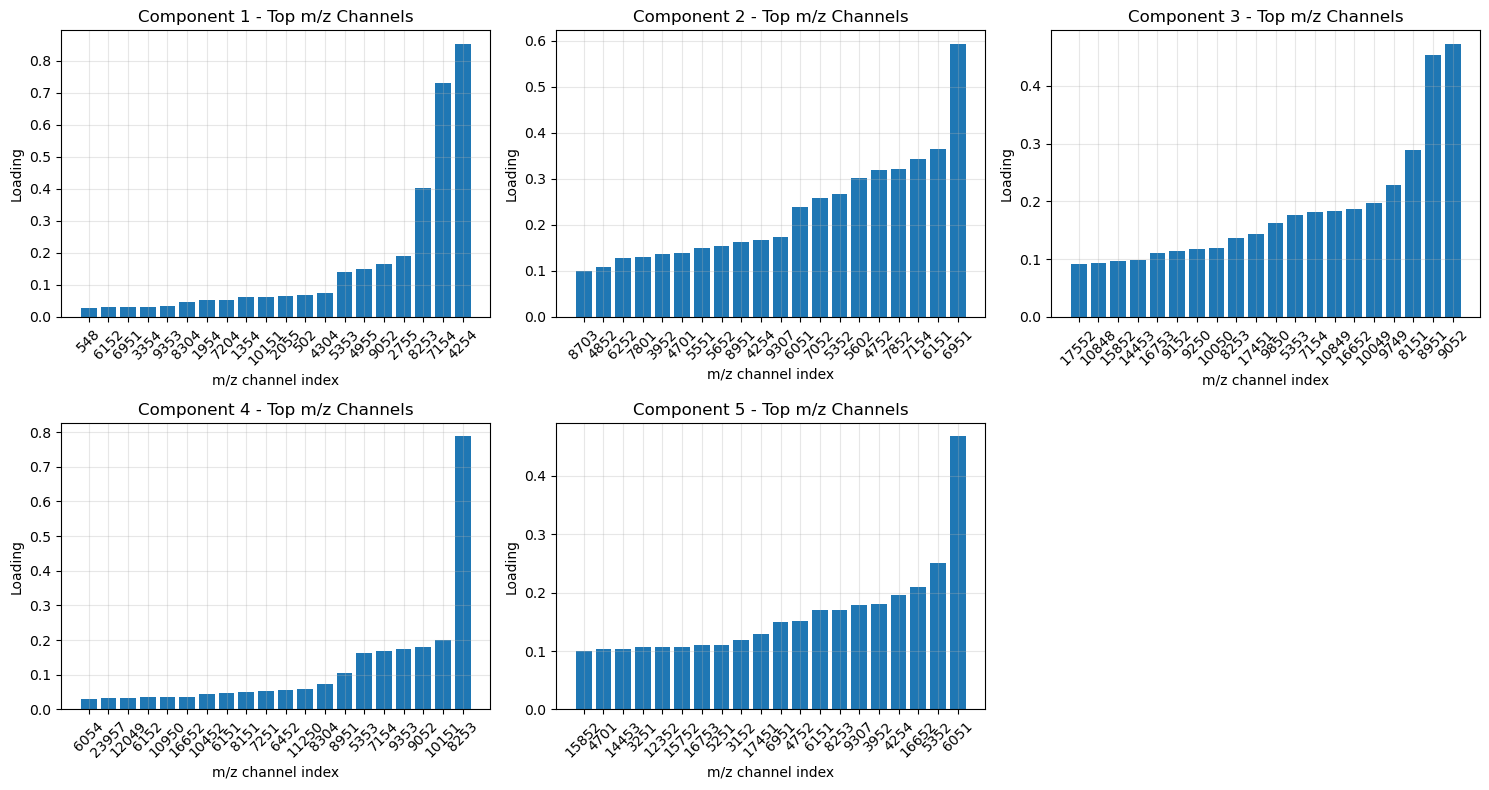

In [7]:
plt.figure(figsize=(15, 8))
n_top_components = min(5, n_components)
for i in range(n_top_components):
    # Find top m/z channels for this component
    top_mz_indices = np.argsort(H[i])[-20:]  # Top 20 m/z channels
    
    plt.subplot(2, 3, i+1)
    plt.bar(range(len(top_mz_indices)), H[i][top_mz_indices])
    plt.title(f'Component {i+1} - Top m/z Channels')
    plt.xlabel('m/z channel index')
    plt.ylabel('Loading')
    plt.xticks(range(len(top_mz_indices)), top_mz_indices, rotation=45)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

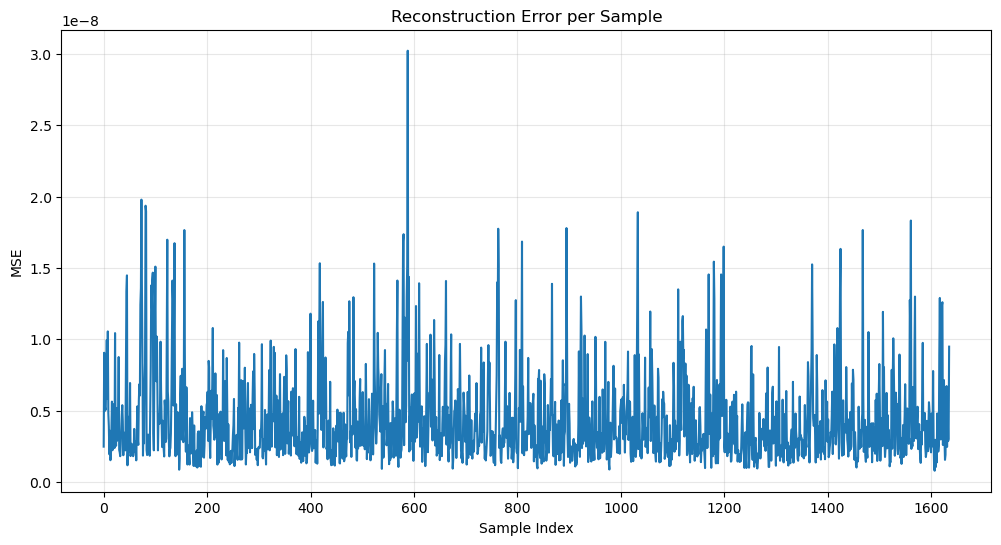

In [9]:
# 7. Reconstruction Error per Sample
sample_errors = np.array([mean_squared_error(X[i], X_reconstructed[i]) for i in range(len(X))])

plt.figure(figsize=(12, 6))
plt.plot(sample_errors)
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Reconstruction Error per Sample')
plt.grid(True, alpha=0.3)
plt.show()

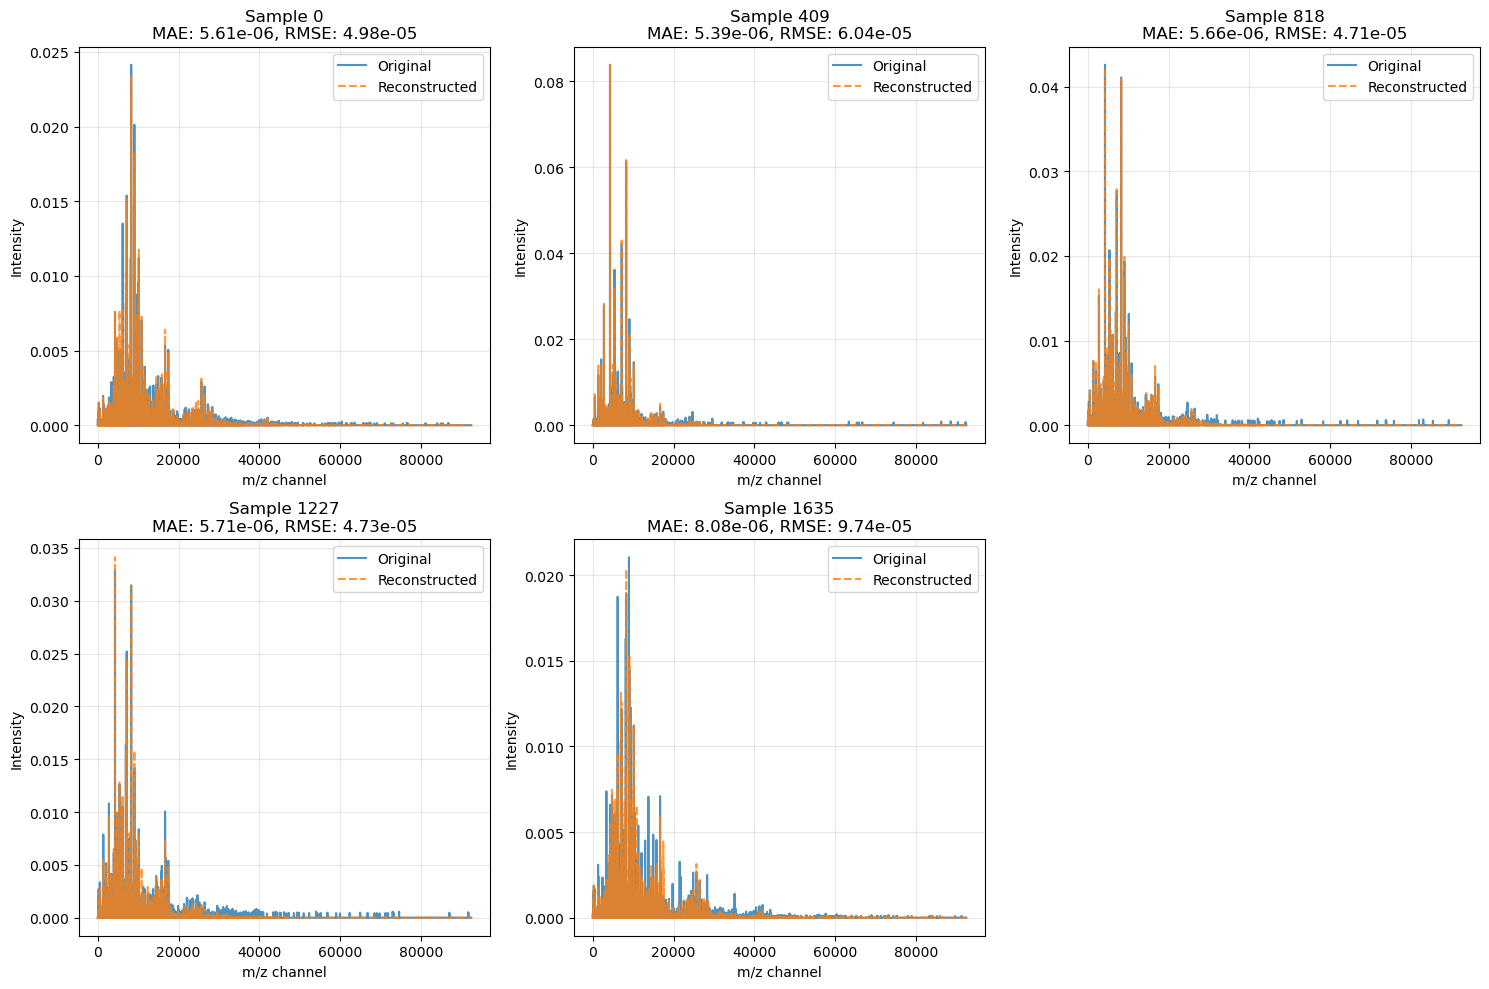

Individual Sample Metrics:
Sample 0: MAE=0.00000561, RMSE=0.00004981, MSE=0.00000000
Sample 409: MAE=0.00000539, RMSE=0.00006036, MSE=0.00000000
Sample 818: MAE=0.00000566, RMSE=0.00004710, MSE=0.00000000
Sample 1227: MAE=0.00000571, RMSE=0.00004731, MSE=0.00000000
Sample 1635: MAE=0.00000808, RMSE=0.00009739, MSE=0.00000001


In [12]:
# 5. Original vs Reconstructed Spectra Comparison
plt.figure(figsize=(15, 10))
sample_indices = [0, len(X)//4, len(X)//2, 3*len(X)//4, len(X)-1]

# Calculate metrics for each sample
sample_mae = []
sample_rmse = []
sample_mse = []

for i, idx in enumerate(sample_indices):
    # Calculate metrics for this specific sample
    mae = mean_absolute_error(X[idx], X_reconstructed[idx])
    rmse = root_mean_squared_error(X[idx], X_reconstructed[idx])
    mse = mean_squared_error(X[idx], X_reconstructed[idx])
    
    sample_mae.append(mae)
    sample_rmse.append(rmse)
    sample_mse.append(mse)
    
    plt.subplot(2, 3, i+1)
    plt.plot(X[idx], label='Original', alpha=0.8)
    plt.plot(X_reconstructed[idx], label='Reconstructed', alpha=0.8, linestyle='--')
    plt.title(f'Sample {idx}\nMAE: {mae:.2e}, RMSE: {rmse:.2e}')
    plt.xlabel('m/z channel')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print metrics for all samples
print("Individual Sample Metrics:")
for i, idx in enumerate(sample_indices):
    print(f"Sample {idx}: MAE={sample_mae[i]:.8f}, RMSE={sample_rmse[i]:.8f}, MSE={sample_mse[i]:.8f}")
